In [14]:
# PS8
# Collaborators Kimberly and Azul

In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
# Read given data
def read_data(name):
    X = np.genfromtxt(name + '_features.txt', delimiter=',')
    Y = np.genfromtxt(name + '_labels.txt')
    return X, Y

name = "RRLyrae"
X, Y = read_data(name)

In [3]:
# Split data into test data and training data
x_train, x_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
# Problem 1

"""
Args: X, Y of data, and the CLF
Creates a decision tree and computes the 5 fold cross validation score. 
Prints the accuracy of the prediction.
"""
def decision_tree_RRLyrae(x, y, clf):
    clf.fit(x, y)
    # 5-fold validation to compute acuuracy of prediction
    scores = cross_val_score(clf, x, y, cv=5) 
    print("Decision tree accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
"""
Args: Clf
Returns a truth matrix of the decision tree in the following format:
[TP, FN]
[FP, TN]
"""   
def truth_matrix_RRLyrae(x, y, clf):
    y_pred = cross_val_predict(clf, x, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    print(conf_matrix)
    return conf_matrix
    
"""
Args: Any Truth matrix 1 and truth matrix 2
Computes statistical analysis of the decision tree.
Prints the statistical analysis of each component of truth matrix2, analyzing the % change compared to truth matrix1.
Computes the RR Lyrae detection rate, which is accurate predicted RR Lyrae (TN) divied by the total RR Lyrae,
which is (FP+TN).
Computes the negative prediction rate, which is the rate at which stars were catergoried as RR Lyrae, regardless of accuracy.
Used to determine which clf is best for predicting RR Lyrae stars.

"""
def decision_tree_results(matrix1, matrix2):
    print('Results:')
    
    TP1 = matrix1[0][0]
    FN1 = matrix1[0][1]
    FP1 = matrix1[1][0]
    TN1 = matrix1[1][1]

    TP2 = matrix2[0][0]
    FN2 = matrix2[0][1]
    FP2 = matrix2[1][0]
    TN2 = matrix2[1][1]

    
    print('FN' ,((FN2-FN1)/FN1)*100, '% change')
    print('TN' ,((TN2-TN1)/TN1)*100, '% change')
    print('TP' ,((TP2-TP1)/TP1)*100, '% change')
    print('FP' ,((FP2-FP1)/FP1)*100, '% change')
    print('Negative prediction rate1' ,((TN1+FN1)/(TN1+FN1+FP1+TP1))*100, '%')
    print('Negative prediction rate2' ,((TN2+FN2)/(TN2+FN2+FP2+TP2))*100, '%')
    print('Negative prediction rate change' ,((TN2+FN2)/(TN2+FN2+FP2+TP2)-(TN1+FN1)/(TN1+FN1+FP1+TP1))*100, '%')
    print('RR Lyrae detection rate 1' ,((TN1/(FP1+TN1))*100), '%')
    print('RR Lyrae detection rate 2' ,((TN2/(FP2+TN2))*100), '%')
    print('RR Lyrae detection rate change' , (((TN2/(FP2+TN2)))-((TN1/(FP1+TN1))))*100, '% change')

In [5]:
# Accuracy and truth matrix for decision tree with no max depth and weight class NOT set to balanced
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier())
truth_matrix_1 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier())

Decision tree accuracy: 1.00 (+/- 0.00)
[[73977   166]
 [  175   194]]


In [6]:
# Accuracy and truth matrix for decision tree with weight class set to balanced
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(class_weight = 'balanced'))
truth_matrix_2 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(class_weight = 'balanced'))
# Comparing decision trees, class weight NOT set to balanced vs class weight set to balanced
decision_tree_results(truth_matrix_1, truth_matrix_2)

Decision tree accuracy: 1.00 (+/- 0.00)
[[73995   148]
 [  178   191]]
Results:
FN -10.843373493975903 % change
TN -1.5463917525773196 % change
TP 0.02433188693783203 % change
FP 1.7142857142857144 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 0.45496027485505697 %
Negative prediction rate change -0.028183379858277846 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 51.76151761517615 %
RR Lyrae detection rate change -0.8130081300812941 % change


In [36]:
"""
Setting the class weight to balanced is not more accurate. It decreased the number of False negatives by 10.8%. 
It also decreased the number of True Negatives by 1.54%.Overall, the RR Lyrae detection rate decreased by 0.81%,
and the negative prediction rate decreased by .028%, making it less accurate.
"""

0.48336594911937375


'\nTruth Matrix format:\n[TP, FN]\n[FP, TN]\n\nOnly 1% of the data are RR lyrae stars. The negative, which coorelates to being RR Lyrae has only a 49.3% accuracy\nas 255 were false negatives, while only 251 were true negatives.\n\n'

In [ ]:
"""
In this case, we want detect as many RR Lyrae stars as possible, even if it means a higher false negative rate. 
So we want the highest negative prediction rate. 
The depth that gives the highest number of RR Lyrae detections is best.
"""

In [7]:
# Accuracy and truth matrix for decision tree with max depth set to 3
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=3))
truth_matrix_3 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=3))
decision_tree_results(truth_matrix_1, truth_matrix_3)

Decision tree accuracy: 1.00 (+/- 0.00)
[[74143     0]
 [  369     0]]
Results:
FN -100.0 % change
TN -100.0 % change
TP 0.22439406842667317 % change
FP 110.85714285714286 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 0.0 %
Negative prediction rate change -0.4831436547133348 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 0.0 %
RR Lyrae detection rate change -52.574525745257446 % change


In [8]:
# Accuracy and truth matrix for decision tree with max depth set to 4
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=4))
truth_matrix_4 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=4))
decision_tree_results(truth_matrix_1, truth_matrix_4)

Decision tree accuracy: 1.00 (+/- 0.00)
[[73969   174]
 [  187   182]]
Results:
FN 4.819277108433735 % change
TN -6.185567010309279 % change
TP -0.010814171972369791 % change
FP 6.857142857142858 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 0.4777753918831866 %
Negative prediction rate change -0.005368262830148223 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 49.32249322493225 %
RR Lyrae detection rate change -3.2520325203251987 % change


In [9]:
# Accuracy and truth matrix for decision tree with max depth set to 5
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=5))
truth_matrix_5 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=5))
decision_tree_results(truth_matrix_1, truth_matrix_5)

Decision tree accuracy: 1.00 (+/- 0.00)
[[73959   184]
 [  152   217]]
Results:
FN 10.843373493975903 % change
TN 11.855670103092782 % change
TP -0.02433188693783203 % change
FP -13.142857142857142 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 0.5381683487223534 %
Negative prediction rate change 0.05502469400901862 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 58.80758807588076 %
RR Lyrae detection rate change 6.233062330623307 % change


In [ ]:
"""
Max depth 4 was the best, as it gave the highest rate of TN, accurately detected RR Lyrae. 
The FP rate was also the lowest. The negative prediction rate was the highest, and the 
RR Lyrae detection rate was the highest, making it the most accurate.
"""

In [10]:
# Accuracy and truth matrix for decision tree with max depth set to 30, and weight class set to balanced
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=30, class_weight='balanced'))
truth_matrix_6 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=30, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_6)

Decision tree accuracy: 1.00 (+/- 0.00)
[[73981   162]
 [  160   209]]
Results:
FN -2.4096385542168677 % change
TN 7.731958762886598 % change
TP 0.005407085986184896 % change
FP -8.571428571428571 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 0.4979063774962422 %
Negative prediction rate change 0.014762722782907418 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 56.639566395663955 %
RR Lyrae detection rate change 4.0650406504065035 % change


In [11]:
# Accuracy and truth matrix for decision tree with max depth set to 4, and weight class set to balanced
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=4, class_weight='balanced'))
truth_matrix_7 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=4, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_7)

Decision tree accuracy: 0.97 (+/- 0.00)
[[72237  1906]
 [    9   360]]
Results:
FN 1048.1927710843374 % change
TN 85.56701030927834 % change
TP -2.3520824039904293 % change
FP -94.85714285714286 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 3.0411208932789346 %
Negative prediction rate change 2.5579772385656 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 97.5609756097561 %
RR Lyrae detection rate change 44.986449864498645 % change


In [12]:
# Accuracy and truth matrix for decision tree with max depth set to 15, and weight class set to balanced
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=15, class_weight='balanced'))
truth_matrix_8 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=15, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_8)

Decision tree accuracy: 0.99 (+/- 0.00)
[[73565   578]
 [   50   319]]
Results:
FN 248.19277108433738 % change
TN 64.43298969072166 % change
TP -0.5569298565770442 % change
FP -71.42857142857143 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 1.2038329396607257 %
Negative prediction rate change 0.720689284947391 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 86.44986449864498 %
RR Lyrae detection rate change 33.87533875338754 % change


In [13]:
"""
Most accurate. Combined with the class weight set to balanced, setting the max depth to 3 was the most accurate.
"""
# Accuracy and truth matrix for decision tree with max depth set to 3, and weight class set to balanced
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
truth_matrix_11 = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
decision_tree_results(truth_matrix_1, truth_matrix_11)

Decision tree accuracy: 0.97 (+/- 0.00)
[[72189  1954]
 [    6   363]]
Results:
FN 1077.1084337349398 % change
TN 87.11340206185567 % change
TP -2.4169674358246485 % change
FP -96.57142857142857 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 3.1095662443633243 %
Negative prediction rate change 2.6264225896499895 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 98.3739837398374 %
RR Lyrae detection rate change 45.79945799457995 % change


In [34]:
# Test data for most accurate decision tree: class weight set to balanced, max depth = 3
# Comparing test truth matrix to training truth matrix
decision_tree_RRLyrae(x_test, Y_test, DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
truth_matrix_test = truth_matrix_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
decision_tree_results(truth_matrix_11, truth_matrix_test)

Decision tree accuracy: 0.98 (+/- 0.00)
[[72189  1954]
 [    6   363]]
Results:
FN 0.0 % change
TN 0.0 % change
TP 0.0 % change
FP 0.0 % change
Negative prediction rate1 3.1095662443633243 %
Negative prediction rate2 3.1095662443633243 %
Negative prediction rate change 0.0 %
RR Lyrae detection rate 1 98.3739837398374 %
RR Lyrae detection rate 2 98.3739837398374 %
RR Lyrae detection rate change 0.0 % change


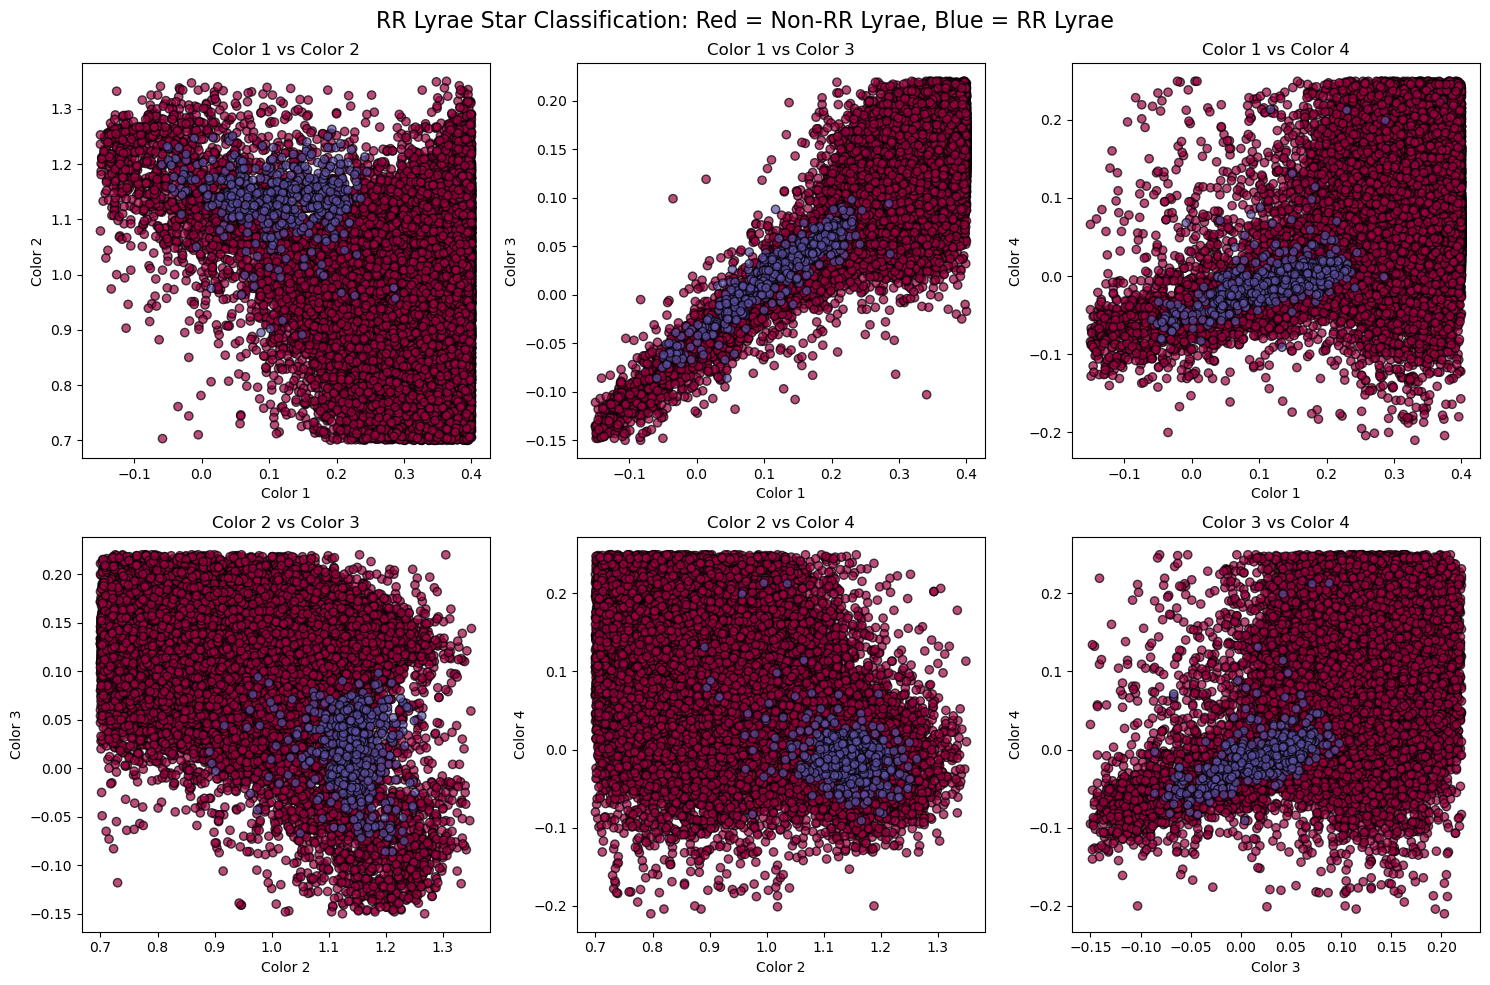

In [14]:
"""
Plotting RR Lyrae star classifications for different combinations of colors
"""
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plotting color 1 vs color 2
axs[0, 0].scatter(X[:, 0], X[:, 1], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[0, 0].set_xlabel('Color 1')
axs[0, 0].set_ylabel('Color 2')
axs[0, 0].set_title('Color 1 vs Color 2')

# Plotting color 1 vs color 3
axs[0, 1].scatter(X[:, 0], X[:, 2], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[0, 1].set_xlabel('Color 1')
axs[0, 1].set_ylabel('Color 3')
axs[0, 1].set_title('Color 1 vs Color 3')

# Plotting color 1 vs color 4
axs[0, 2].scatter(X[:, 0], X[:, 3], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[0, 2].set_xlabel('Color 1')
axs[0, 2].set_ylabel('Color 4')
axs[0, 2].set_title('Color 1 vs Color 4')

# Plotting color 2 vs color 3
axs[1, 0].scatter(X[:, 1], X[:, 2], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[1, 0].set_xlabel('Color 2')
axs[1, 0].set_ylabel('Color 3')
axs[1, 0].set_title('Color 2 vs Color 3')

# Plotting color 2 vs color 4
axs[1, 1].scatter(X[:, 1], X[:, 3], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[1, 1].set_xlabel('Color 2')
axs[1, 1].set_ylabel('Color 4')
axs[1, 1].set_title('Color 2 vs Color 4')

# Plotting color 3 vs color 4
axs[1, 2].scatter(X[:, 2], X[:, 3], c=Y, cmap='Spectral', edgecolor='k', alpha=0.7)
axs[1, 2].set_xlabel('Color 3')
axs[1, 2].set_ylabel('Color 4')
axs[1, 2].set_title('Color 3 vs Color 4')

fig.suptitle('RR Lyrae Star Classification: Red = Non-RR Lyrae, Blue = RR Lyrae', fontsize=16)
plt.tight_layout()
plt.show()


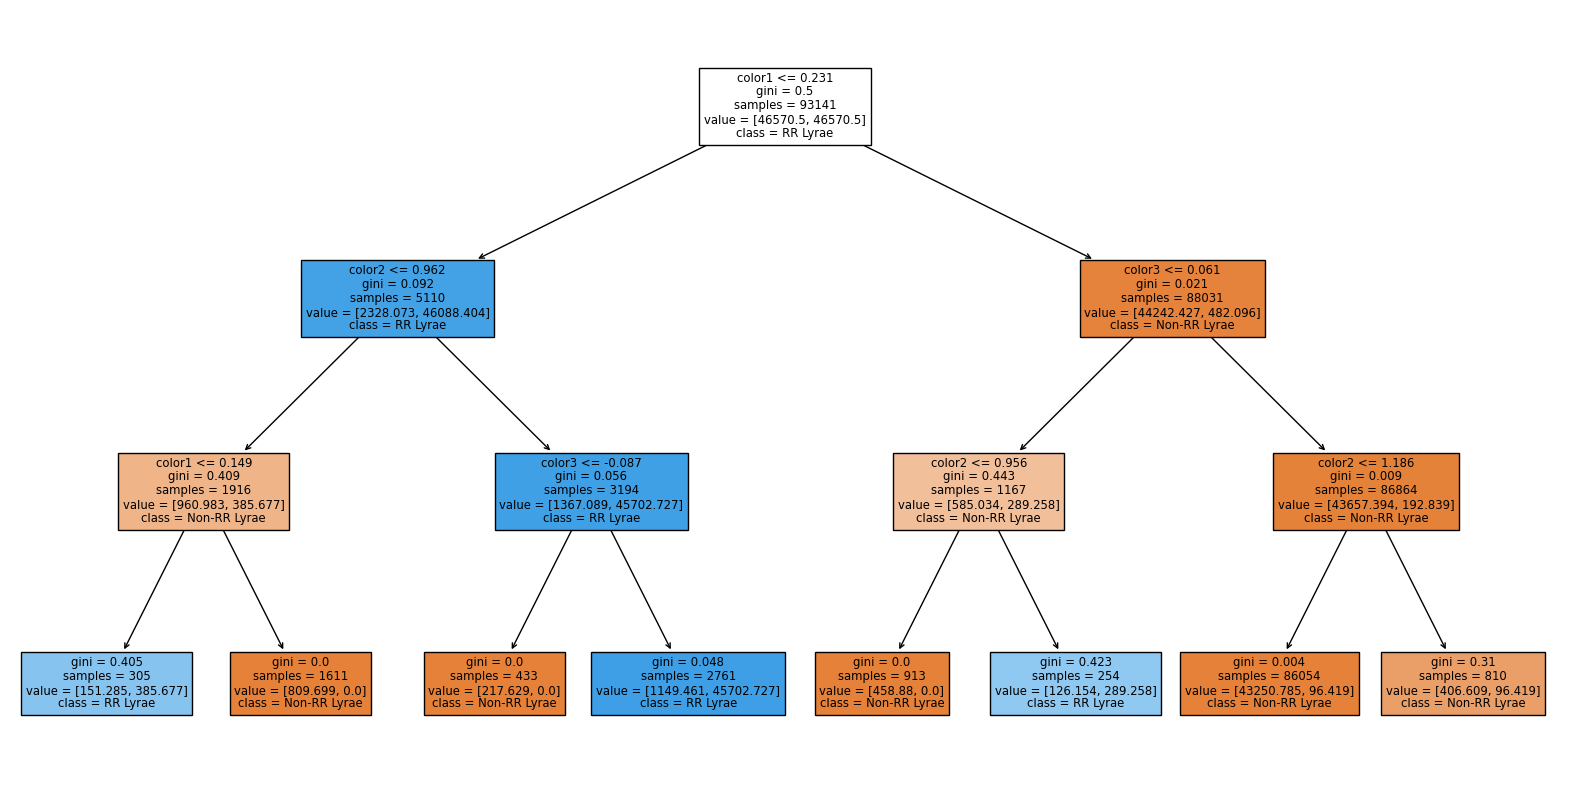

In [15]:
# Plotting decision tree
clf = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf.fit(X, Y)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['color1', 'color2', 'color3', 'color4'], class_names=['Non-RR Lyrae', 'RR Lyrae'])
plt.show()

In [18]:
# Problem 2
"""
Args: X, Y of data, and the CLF_svm
Creates a decision tree and computes the 5 fold cross validation score. 
Prints the accuracy of the prediction.
"""
def svm_RRLyrae(x, y, clf_svm):
    # 5-fold validation to compute acuuracy of prediction
    scores_svm = cross_val_score(clf_svm, x, y, cv=5)
    print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))
    
"""
Args: Clf
Returns a truth matrix of the clf_svm in the following format:
[TP, FN]
[FP, TN]
"""   
def truth_matrix_svm(x, y, clf_svm):
    y_pred_svm = cross_val_predict(clf_svm, x, y, cv=5)
    conf_matrix_svm = confusion_matrix(y, y_pred_svm)
    return conf_matrix_svm

"""
Args: Any truth matrix 1 and truth matrix 2
Computes statistical analysis of the decision tree.
Prints the statistical analysis of each component of truth matrix2, analyzing the % change compared to truth matrix1.
Computes the RR Lyrae detection rate, which is accurate predicted RR Lyrae (TN) divied by the total RR Lyrae,
which is (FP+TN).
Computes the negative prediction rate, which is the rate at which stars were catergoried as RR Lyrae, regardless of accuracy.
Used to determine which clf is best for predicting RR Lyrae stars.

"""
def svm_results(matrix1, matrix2):
    print('Results:')
    
    TP1 = matrix1[0][0]
    FN1 = matrix1[0][1]
    FP1 = matrix1[1][0]
    TN1 = matrix1[1][1]

    TP2 = matrix2[0][0]
    FN2 = matrix2[0][1]
    FP2 = matrix2[1][0]
    TN2 = matrix2[1][1]
    
    
    print('FN' ,((FN2-FN1)/FN1)*100, '% change')
    print('TN' ,((TN2-TN1)/TN1)*100, '% change')
    print('TP' ,((TP2-TP1)/TP1)*100, '% change')
    print('FP' ,((FP2-FP1)/FP1)*100, '% change')
    print('Negative prediction rate1' ,((TN1+FN1)/(TN1+FN1+FP1+TP1))*100, '%')
    print('Negative prediction rate2' ,((TN2+FN2)/(TN2+FN2+FP2+TP2))*100, '%')
    print('Negative prediction rate change' ,((TN2+FN2)/(TN2+FN2+FP2+TP2)-(TN1+FN1)/(TN1+FN1+FP1+TP1))*100, '%')
    print('RR Lyrae detection rate 1' ,((TN1/(FP1+TN1))*100), '%')
    print('RR Lyrae detection rate 2' ,((TN2/(FP2+TN2))*100), '%')
    print('RR Lyrae detection rate change' , (((TN2/(FP2+TN2)))-((TN1/(FP1+TN1))))*100, '% change')

In [19]:
"""
Comparing SVM classifier (class weight NOT set to balanced), to decision tree truth matrix 1: class weight NOT set
and max depth NOT set.
"""
clf_svm = SVC()
svm_RRLyrae(x_train, y_train, clf_svm)
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier())
truth_matrix_svm_result = truth_matrix_svm(x_train, y_train, clf_svm)
print('Truth matrix SVM')
print(truth_matrix_svm_result)
print('Decision tree truth matrix')
print(truth_matrix_1)
svm_results(truth_matrix_1, truth_matrix_svm_result)

SVM Accuracy: 1.00 (+/- 0.00)
Decision tree accuracy: 1.00 (+/- 0.00)
Truth matrix SVM
[[74143     0]
 [  369     0]]
Decision tree truth matrix
[[73977   166]
 [  175   194]]
Results:
FN -100.0 % change
TN -100.0 % change
TP 0.22439406842667317 % change
FP 110.85714285714286 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 0.0 %
Negative prediction rate change -0.4831436547133348 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 0.0 %
RR Lyrae detection rate change -52.574525745257446 % change


In [21]:
"""
Comparing SVM classifier (class weight NOT set to balanced), to decision tree truth matrix 11: most accurate 
decision tree with max depth = 3 and class weight set to balanced.
"""
svm_RRLyrae(x_train, y_train, clf_svm)
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
print('Truth matrix SVM')
print(truth_matrix_svm_result)
print('Most Accurate Decision tree truth matrix')
print(truth_matrix_11)
svm_results(truth_matrix_11, truth_matrix_svm_result)

SVM Accuracy: 1.00 (+/- 0.00)
Decision tree accuracy: 0.97 (+/- 0.00)
Truth matrix SVM
[[74143     0]
 [  369     0]]
Most Accurate Decision tree truth matrix
[[72189  1954]
 [    6   363]]
Results:
FN -100.0 % change
TN -100.0 % change
TP 2.7067835819861754 % change
FP 6050.0 % change
Negative prediction rate1 3.1095662443633243 %
Negative prediction rate2 0.0 %
Negative prediction rate change -3.1095662443633243 %
RR Lyrae detection rate 1 98.3739837398374 %
RR Lyrae detection rate 2 0.0 %
RR Lyrae detection rate change -98.3739837398374 % change


In [22]:
# Comparing svm (class weight = balanced) to the most basic decision tree with no max depth and no class weight
clf_svm_balanced = SVC(class_weight='balanced')
svm_RRLyrae(x_train, y_train, clf_svm_balanced)
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier())
truth_matrix_svm_balanced = truth_matrix_svm(x_train, y_train, clf_svm_balanced)
print('Truth matrix SVM')
print(truth_matrix_svm_balanced)
print('Decision tree truth matrix')
print(truth_matrix_1)
svm_results(truth_matrix_1, truth_matrix_svm_balanced)

SVM Accuracy: 0.97 (+/- 0.00)
Decision tree accuracy: 1.00 (+/- 0.00)
Truth matrix SVM
[[71842  2301]
 [    4   365]]
Decision tree truth matrix
[[73977   166]
 [  175   194]]
Results:
FN 1286.1445783132529 % change
TN 88.14432989690721 % change
TP -2.886032145126188 % change
FP -97.71428571428571 % change
Negative prediction rate1 0.4831436547133348 %
Negative prediction rate2 3.577947176293751 %
Negative prediction rate change 3.0948035215804164 %
RR Lyrae detection rate 1 52.574525745257446 %
RR Lyrae detection rate 2 98.91598915989161 %
RR Lyrae detection rate change 46.341463414634156 % change


In [23]:
# Comparing svm (class weight = balanced) to most accurate decision tree: max depth = 3, class weight set to balanced
svm_RRLyrae(x_train, y_train, SVC(class_weight='balanced'))
decision_tree_RRLyrae(x_train, y_train, DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
print('Truth matrix SVM balanced')
print(truth_matrix_svm_balanced)
print('Truth matrix most accurate decision tree')
print(truth_matrix_11)
svm_results(truth_matrix_11, truth_matrix_svm_balanced)

SVM Accuracy: 0.97 (+/- 0.00)
Decision tree accuracy: 0.97 (+/- 0.00)
Truth matrix SVM balanced
[[71842  2301]
 [    4   365]]
Truth matrix most accurate decision tree
[[72189  1954]
 [    6   363]]
Results:
FN 17.75844421699079 % change
TN 0.5509641873278237 % change
TP -0.48068265248168 % change
FP -33.33333333333333 % change
Negative prediction rate1 3.1095662443633243 %
Negative prediction rate2 3.577947176293751 %
Negative prediction rate change 0.4683809319304271 %
RR Lyrae detection rate 1 98.3739837398374 %
RR Lyrae detection rate 2 98.91598915989161 %
RR Lyrae detection rate change 0.5420054200542035 % change


In [ ]:
"""
Comparing the most accurate decision tree to the svm classifier using balanced weighting:
The svm classifier was slightly more accurate. The calculated accuracy was the same, but the negative prediction rate was
slightly higher in the svm classifier, and the lyrae detection rate was also slightly higher, making the svm classifier
a better choice. 
"""

In [29]:
# Changing the kernal

# Linear kernal compared to standard balanced weighting
clf_svm_linear = SVC(class_weight='balanced', kernel='linear')
print('Linear kernal')
svm_RRLyrae(x_train, y_train, clf_svm_linear)
truth_matrix_svm_linear = truth_matrix_svm(x_train, y_train, clf_svm_linear)
print(truth_matrix_svm_linear)
print("\n\n")
print("Standard")
svm_RRLyrae(x_train, y_train, SVC(class_weight='balanced'))
print(truth_matrix_svm_balanced)
svm_results(truth_matrix_svm_balanced, truth_matrix_svm_linear)

Linear kernal
SVM Accuracy: 0.97 (+/- 0.00)
[[71544  2599]
 [    3   366]]



Standard
SVM Accuracy: 0.97 (+/- 0.00)
[[71842  2301]
 [    4   365]]
Results:
FN 12.950890916992611 % change
TN 0.273972602739726 % change
TP -0.4147991425628462 % change
FP -25.0 % change
Negative prediction rate1 3.577947176293751 %
Negative prediction rate2 3.979224822847326 %
Negative prediction rate change 0.4012776465535751 %
RR Lyrae detection rate 1 98.91598915989161 %
RR Lyrae detection rate 2 99.1869918699187 %
RR Lyrae detection rate change 0.27100271002709064 % change


In [31]:
# Polynomial kernal compared to standard balanced weighting
clf_svm_poly = SVC(class_weight='balanced', kernel='poly', degree=3)
print('Polynomial kernal')
svm_RRLyrae(x_train, y_train, clf_svm_poly)
truth_matrix_svm_poly = truth_matrix_svm(x_train, y_train, clf_svm_poly)
print(truth_matrix_svm_poly)
print("\n\n")
print("Standard")
svm_RRLyrae(x_train, y_train, SVC(class_weight='balanced'))
print(truth_matrix_svm_balanced)
svm_results(truth_matrix_svm_balanced, truth_matrix_svm_poly)

Polynomial kernal
SVM Accuracy: 0.97 (+/- 0.00)
[[71861  2282]
 [    4   365]]



Standard
SVM Accuracy: 0.97 (+/- 0.00)
[[71842  2301]
 [    4   365]]
Results:
FN -0.8257279443720122 % change
TN 0.0 % change
TP 0.026446925196959993 % change
FP 0.0 % change
Negative prediction rate1 3.577947176293751 %
Negative prediction rate2 3.5524479278505474 %
Negative prediction rate change -0.025499248443203865 %
RR Lyrae detection rate 1 98.91598915989161 %
RR Lyrae detection rate 2 98.91598915989161 %
RR Lyrae detection rate change 0.0 % change


In [30]:
# Sigmoid kernal compared to standard balanced weighting
clf_svm_sigmoid = SVC(class_weight='balanced', kernel='sigmoid')
print('Sigmoid kernal')
svm_RRLyrae(x_train, y_train, clf_svm_sigmoid)
truth_matrix_svm_sigmoid = truth_matrix_svm(x_train, y_train, clf_svm_sigmoid)
print(truth_matrix_svm_sigmoid)
print("\n\n")
print("Standard")
svm_RRLyrae(x_train, y_train, SVC(class_weight='balanced'))
print(truth_matrix_svm_balanced)
svm_results(truth_matrix_svm_balanced, truth_matrix_svm_sigmoid)

Sigmoid kernal
SVM Accuracy: 0.42 (+/- 0.01)
[[31191 42952]
 [  213   156]]



Standard
SVM Accuracy: 0.97 (+/- 0.00)
[[71842  2301]
 [    4   365]]
Results:
FN 1766.6666666666667 % change
TN -57.26027397260274 % change
TP -56.58389243061161 % change
FP 5225.0 % change
Negative prediction rate1 3.577947176293751 %
Negative prediction rate2 57.85376852050676 %
Negative prediction rate change 54.275821344213014 %
RR Lyrae detection rate 1 98.91598915989161 %
RR Lyrae detection rate 2 42.27642276422765 %
RR Lyrae detection rate change -56.63956639566396 % change


In [ ]:
# Does changing the kernal change the result?
"""
Linear kernal: The accuracy was similar, and the RR Lyrae detection rate was similar, making it very similar to the 
standard svm, but it was slightly more accurate.
Polynomial kernal: The accuracy was the same, and the RR Lyrae detection rate was the same, making it very similar to the 
standard svm.
Sigmoid kernal: The accuracy was significantly lower, 55%, and the RR Lyrae detection rate dropped by 56.6%, making it 
significantly less accurate compared to the standard svm.
"""

In [36]:
# Test data svm classifier with balanced weighting
# Comparing test data with training data
print('Training data')
svm_RRLyrae(x_train, y_train, SVC(class_weight='balanced'))
print('Test data')
svm_RRLyrae(x_test, Y_test, SVC(class_weight='balanced'))
truth_matrix_svm_balanced_test = truth_matrix_svm(x_test, Y_test, clf_svm_balanced)
print('Truth matrix training data (svm balanced weighting)')
print(truth_matrix_svm_balanced)
print('Truth matrix test data (svm balanced weighting)')
print(truth_matrix_svm_balanced_test)
svm_results(truth_matrix_svm_balanced, truth_matrix_svm_balanced_test)

Training data
SVM Accuracy: 0.97 (+/- 0.00)
Test data
SVM Accuracy: 0.97 (+/- 0.01)
Truth matrix training data (svm balanced weighting)
[[71842  2301]
 [    4   365]]
Truth matrix test data (svm balanced weighting)
[[17891   624]
 [    2   112]]
Results:
FN -72.88135593220339 % change
TN -69.31506849315069 % change
TP -75.09674006848361 % change
FP -50.0 % change
Negative prediction rate1 3.577947176293751 %
Negative prediction rate2 3.9508293520854583 %
Negative prediction rate change 0.37288217579170696 %
RR Lyrae detection rate 1 98.91598915989161 %
RR Lyrae detection rate 2 98.24561403508771 %
RR Lyrae detection rate change -0.6703751248038903 % change


In [40]:
# Comparing test data with training data for linear kernel
print('Training data')
svm_RRLyrae(x_train, y_train, SVC(class_weight='balanced', kernel = 'linear'))
print('Test data')
svm_RRLyrae(x_test, Y_test, SVC(class_weight='balanced', kernel='linear'))
print('Truth matrix training data (linear kernel)')
print(truth_matrix_svm_linear)
print('Truth matrix test data (linear kernel)')
print(truth_matrix_svm_linear_test)
svm_results(truth_matrix_svm_balanced, truth_matrix_svm_balanced_test)

Training data
SVM Accuracy: 0.97 (+/- 0.00)
Test data
SVM Accuracy: 0.97 (+/- 0.01)
Truth matrix training data (linear kernel)
[[71544  2599]
 [    3   366]]
Truth matrix test data (linear kernel)
[[17872   643]
 [    1   113]]
Results:
FN -72.88135593220339 % change
TN -69.31506849315069 % change
TP -75.09674006848361 % change
FP -50.0 % change
Negative prediction rate1 3.577947176293751 %
Negative prediction rate2 3.9508293520854583 %
Negative prediction rate change 0.37288217579170696 %
RR Lyrae detection rate 1 98.91598915989161 %
RR Lyrae detection rate 2 98.24561403508771 %
RR Lyrae detection rate change -0.6703751248038903 % change


In [39]:
# Test data 
# Comparing truth matrix of linear and standard kernel
print('Standard kernal test data')
svm_RRLyrae(x_test, Y_test, SVC(class_weight='balanced'))
print('Linear kernal test data')
svm_RRLyrae(x_test, Y_test, SVC(class_weight='balanced', kernel = 'linear'))
truth_matrix_svm_balanced_test = truth_matrix_svm(x_test, Y_test, clf_svm_balanced)
truth_matrix_svm_linear_test = truth_matrix_svm(x_test, Y_test, clf_svm_linear)
print('Truth matrix test data (standard kernal)')
print(truth_matrix_svm_balanced_test)
print('Truth matrix test data (linear kernal)')
print(truth_matrix_svm_linear_test)
svm_results(truth_matrix_svm_linear_test, truth_matrix_svm_balanced_test)

Standard kernal test data
SVM Accuracy: 0.97 (+/- 0.01)
Linear kernal test data
SVM Accuracy: 0.97 (+/- 0.01)
Truth matrix test data (standard kernal)
[[17891   624]
 [    2   112]]
Truth matrix test data (linear kernal)
[[17872   643]
 [    1   113]]
Results:
FN -2.9548989113530326 % change
TN -0.8849557522123894 % change
TP 0.10631154879140554 % change
FP 100.0 % change
Negative prediction rate1 4.05818884534865 %
Negative prediction rate2 3.9508293520854583 %
Negative prediction rate change -0.10735949326319202 %
RR Lyrae detection rate 1 99.12280701754386 %
RR Lyrae detection rate 2 98.24561403508771 %
RR Lyrae detection rate change -0.8771929824561431 % change


In [ ]:
# Which methods are better? 
"""
Overall, none of the kernals seemed to dramatically improve the detection rate. The best method was the svm classifier with 
balanced weighting, with a linear kernel. The decision tree with max depth set to 3 and balanced weighting was
also very accurate. Ultimately, the calculated accuracy was the same, but the negative prediction rate was
slightly higher in the svm classifier, and the RR Lyrae detection rate was also slightly higher, making the svm classifier
a better choice. SVMs are generally better at handling complex, non-linear decision boundaries, which could explain why 
it did better than the deicison tree. Because the dataset is so imbalanced, it makes sense that balancing the weights 
made the results more accurate. balancing the weights helps the classifier pay more attention to the minority class, 
reducing the chqance of missing rare cases. 
"""